# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading properties of the model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [10]:
result_RM_airb = dict()

### Saving files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (45,25)
Number of data: 1125.0
dx: 272.7 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -40.0 degree
Main field declination: -22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -25.0 degree
Declination: 30.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [18]:
h = 1150.

#### Generating a layer

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [21]:
i_pos = 1250

In [22]:
it_max = 30

In [23]:
it_marq = 15

In [24]:
lamb = 10.
dlamb = 100.

In [25]:
eps_e = 1e-4
eps_i = 1e-4

In [26]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,2*1e6] 

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-16.00739425592717 -7.679628310897852
0.13333947253529385
i = 1
-19.90642746026389 -5.059488191999931
0.0943052473874035
i = 2
-22.677830826538163 -2.510565910519259
0.06723019159967956
i = 3
-24.667572149931818 -0.09306606928297775
0.04769316571575813
i = 4
-26.19747930116894 2.4192858607482
0.0407855921866697
i = 5
-27.41166217383796 4.999779510600987
0.03802931350261293
i = 6
-28.37155349026342 7.612938768711664
0.03720592452769966
i = 7
-29.085263950972926 10.149302526666222
0.03499771600701837
i = 8
-29.566737526191197 12.62528516024811
0.03448884343023083
i = 9
-29.844453533343508 14.932854246144675
0.03205554282711154
i = 10
-29.962768408464836 17.01578541529513
0.02845728788019849
i = 11
-29.970975715088862 18.851220512646176
0.024215669483303295
i = 12
-29.906039638360735 20.427868505938708
0.019489690829123982
i = 13
-29.800495853820365 21.754946439494404
0.014912995380064895
i = 14
-29.68520849092382 22.858842218965464
0.01096303894632957
i = 15
-29.58022548006021 23.7

-29.1747027155742 28.44485526133622
0.0006374403843100037
i = 27
-29.165472400653076 28.681287852174037
0.0005569616924488979
i = 28
-29.15575113358706 28.903929102857667
0.0004951814596681635
i = 29
-29.14557324078132 29.11444640543171
0.0004438669625486165
i = 30
-29.13503134034522 29.313654246442745
0.000398461758274123
i = 31
-29.124231183905305 29.502255679981705
0.00035802743897451236
i = 32
-29.112689959771657 29.68103892377055
0.00032276846960424657
i = 33
-29.100316103941303 29.85124192702013
0.0002936232652462623
i = 34
-29.087269957870113 30.013661840108938
0.00026839015610235047
i = 35
-29.073539431553705 30.168725450948585
0.0002456465215575868
i = 36
-29.058818328411473 30.316953813944632
0.00022568535969931053
i = 37
-29.043171836164678 30.45872688676404
0.00020768656925249215
i = 38
-29.025866722726715 30.595045459660923
0.0001937878533996876
i = 39
-29.007059323056083 30.726146810727784
0.00018106237150561317
i = 40
-28.986894488979402 30.85224585556682
0.0001693657463

-29.58266064273418 14.03691922358419
0.028781906112256384
i = 9
-29.794447081589563 16.283860771733472
0.025273392098315313
i = 10
-29.86221625964637 18.26024660328515
0.021253356085676304
i = 11
-29.83492339370342 19.955098750748068
0.01697093849291544
i = 12
-29.75106529838523 21.375210529165056
0.012838235905093339
i = 13
-29.641041057054892 22.541243288863516
0.00921698801670403
i = 14
-29.528658051696574 23.51060699123005
0.006674241531094744
i = 15
-29.425759204855577 24.30922890072396
0.0046844076697210735
i = 16
-29.335990082079025 24.97075365763482
0.003288772050634095
i = 17
-29.257010383501935 25.547877007455916
0.002541106740077033
i = 18
-29.18984584398232 26.050905873301687
0.001948608411931446
i = 19
-29.135412003397622 26.487990412871763
0.0014765763032719961
i = 20
-29.09236428164477 26.870714409054795
0.0011325035982002814
i = 21
-29.057643691785024 27.214096939376986
0.0009114224505869031
i = 22
-29.028670704689336 27.527184073371433
0.000758011913724036
i = 23
-29.0

## L-curve visualization

<Figure size 648x648 with 0 Axes>

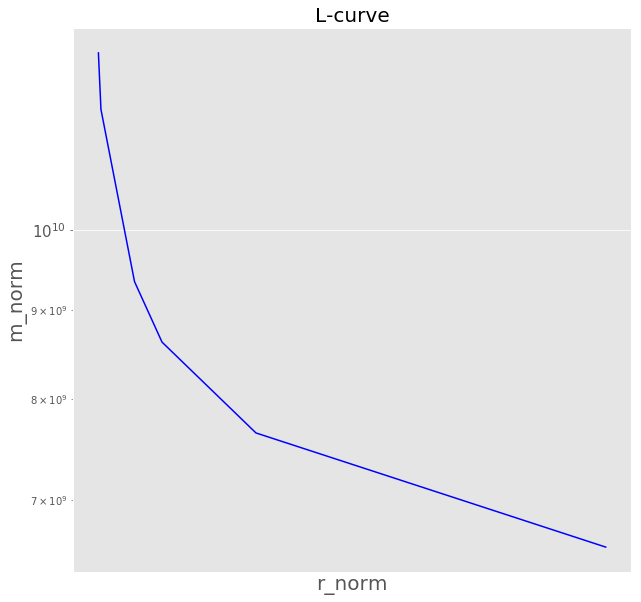

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [29]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
